#Metodo de enventanado -Filtro Pasa-bajas
##Usado para la suprecion de ruido o Noise Cancelling, tecnologia usada en distintos audifonos en la actualidad como lo son los AirPods Pro de Apple.

In [15]:
#Librerias necesarias para el desarrollo del notebook
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftshift
from IPython.display import Audio
from scipy.io.wavfile import read
from matplotlib.pylab import *
import scipy.signal as sp


In [6]:
file_name = "ACDC.wav"      #Nombre de archivo de audio
fs, x = read(file_name)     #Lectura del archivo
x=x[:,1]                    #Audio convertido de estereo a mono
x = x - x / max(abs(x))     #Normalizar señal
t = np.arange(0, len(x) / fs, 1 / fs)       #Vector de tiempo



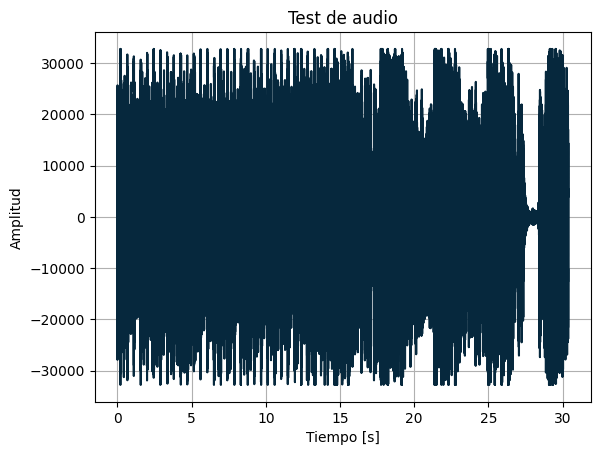

In [7]:
plt.plot(t, x, color="#06283D")
plt.title('Test de audio')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

In [8]:
Audio(x, rate=fs) #Reprodiccion de audio

Output hidden; open in https://colab.research.google.com to view.

In [9]:
X = np.fft.fft(x)                   #Transformada de Fourier
X_freq = np.fft.fftfreq(len(x))*fs  #Vector de frecuencias

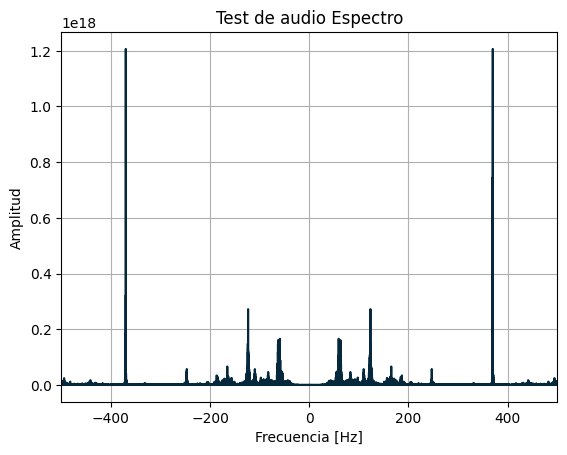

In [30]:
#Grafica del espectro del audio
plt.plot(X_freq, abs(X)**2, color="#06283D")
plt.title('Test de audio Espectro')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud')
plt.xlim([-500,500])
plt.grid()
plt.show()

#Usando un Ripple de 0.003
###$20log_{10}(Ripple)=-50dB$
##Con ese valor se usa la ventana de Hamming

In [11]:
fm = 10         #Ancho de banda de transmision
fc = 100        #Frecuencia de corte
M = 4*(fs/fm)   #Numero de muestras - ventana rectangular
M = int(M)
if (M%2 == 0):
  M = M + 1
print("M = ",M)


M =  19201


In [16]:
wc = 2 * pi * (fc/fs)                                   #Frecuencia de corte normalizada en radianes
n = np.arange(-M // 2 + 1, M // 2 + 1)                  #Vector de muestras
hi = (wc / pi) * (np.sin(wc * n) / wc * n )
win = 0.54 - 0.46 * np.cos((2 * pi * n) / (M - 1))      #Ventana de Hamming
hn = hi * win
w, h = sp.freqz(hn, 1, whole=True)                      #Respuesta en frecuencia del filtro


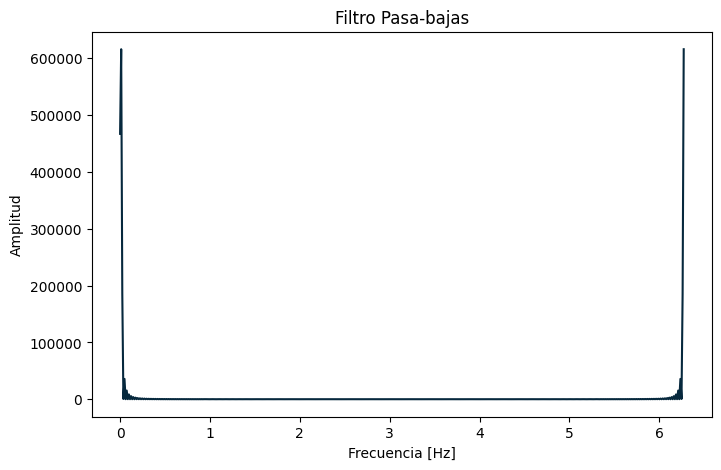

In [17]:
#Gráfica del filtro
plt.figure(figsize=(8, 5))
plt.plot(w, np.abs(h), color = '#06283D')
plt.title("Filtro Pasa-bajas")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud")
plt.show()


In [18]:
#Filtro de la señal de audio
y = np.convolve(hn, x, mode="same")     #Se filtra la señal
Y = np.fft.fft(y)                       #FFT de la señal filtrada
Y_freq = np.fft.fftfreq(len(Y)) * fs    #Vector de frecuencias

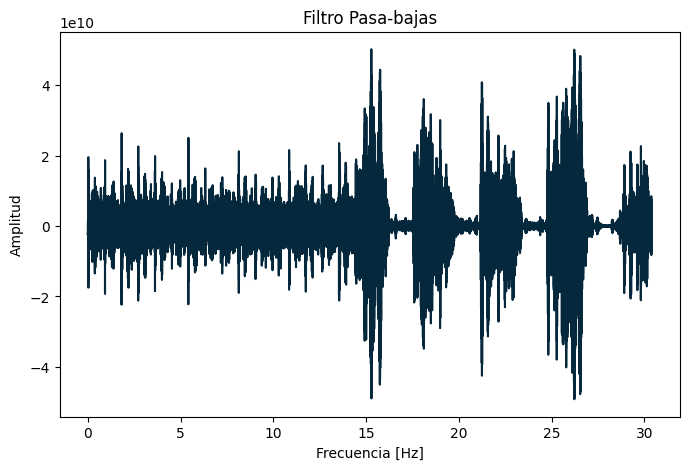

In [19]:
#Gráfica del filtro
plt.figure(figsize=(8, 5))
plt.plot(t, y, color = '#06283D')
plt.title("Filtro Pasa-bajas")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud")
plt.show()

In [20]:
Audio(y, rate=fs)   #Reproduce el audio

Output hidden; open in https://colab.research.google.com to view.

#Metodo de enventanado - Filtro pasa-altos a partir del pasa-bajos (inversion espectral)

In [21]:
wc = 2 * np.pi * fc /fs
n = np.arange(-M //2 +1, M //2 +1)
#Se crea funcion delta que se usa para general filtro pasa altos
delta = np.zeros(len(n))
delta[M//2] = 1

hi = (wc/np.pi) * np.sinc(wc * n / np.pi)   #Respuesta filtro ideal
hi = delta - hi                             #Se aplica reversion espectral
win = 0.54 - 0.46 * np.cos((2 * pi * n) / (M - 1))
hn = hi * win
w, h  = sp.freqz(hn, 1, whole=True)


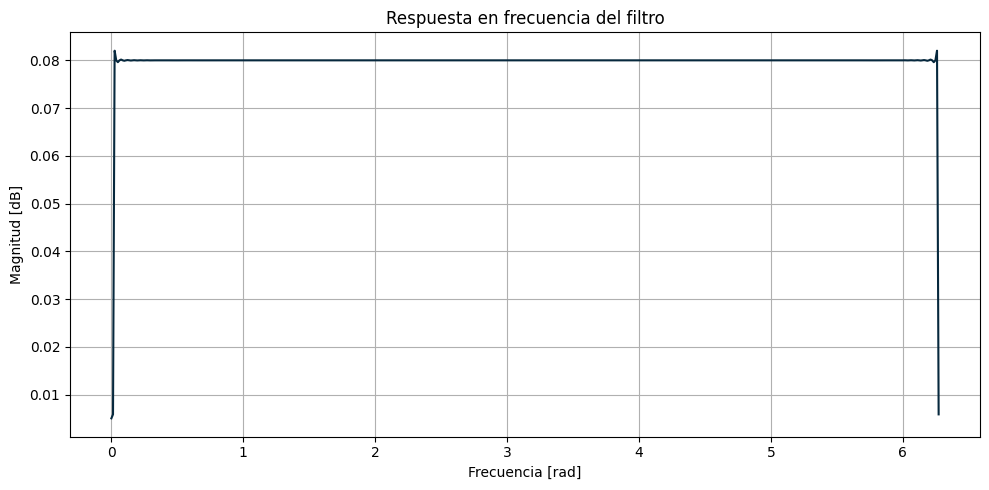

In [22]:
#Grafica del filtro pasa-altas
plt.figure(figsize=(10, 5))
plt.plot(w, np.abs(h), color="#06283D")
plt.xlabel("Frecuencia [rad]")
plt.ylabel("Magnitud [dB]")
plt.title("Respuesta en frecuencia del filtro")
plt.grid()
plt.tight_layout()
plt.show()

In [23]:
#Filtro de la señal de audio
y = np.convolve(hn, x, mode="same")     #Se filtra la señal
Y = np.fft.fft(y)                       #FFT de la señal filtrada
Y_freq = np.fft.fftfreq(len(Y)) * fs    #Vector de frecuencias

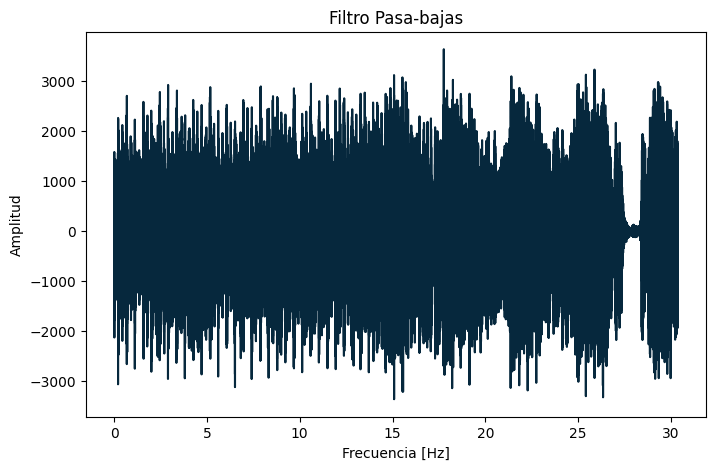

In [24]:
#Gráfica del filtro
plt.figure(figsize=(8, 5))
plt.plot(t, y, color = '#06283D')
plt.title("Filtro Pasa-bajas")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud")
plt.show()

In [25]:
Audio(y, rate=fs)   #Reproduce el audio

Output hidden; open in https://colab.research.google.com to view.

#Diseño de Filtros IIR Mediante Aproximación en Derivada

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz

# Función para diseñar un filtro IIR mediante aproximación en derivada
"""
    Diseña un filtro IIR de aproximación en derivada.

    Parámetros:
    - fc (float): Frecuencia de corte en Hz.
    - fs (float): Frecuencia de muestreo en Hz.
    - order (int): Orden del filtro, por defecto es 4.

    Retorna:
    - b (array): Coeficientes del numerador del filtro.
    - a (array): Coeficientes del denominador del filtro.
    """
def derivative_filter(fc, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = fc / nyquist
    # Diseñar el filtro Butterworth
    b, a = butter(order, normal_cutoff, btype='LOW', analog=False)
    return b, a

# Función para aplicar el filtro a una señal
"""
    Aplica un filtro a una señal utilizando la función de filtro lineal.

    Parámetros:
    - signal (array): Señal de entrada.
    - b (array): Coeficientes del numerador del filtro.
    - a (array): Coeficientes del denominador del filtro.

    Retorna:
    - fs (array): Señal filtrada.
"""

def apply_filter(signal, b, a):
    fs = lfilter(b, a, signal)
    return fs

# Parámetros del filtro
fc = 5.0  # Frecuencia de corte en Hz
sampling_frequency = 100.0  # Frecuencia de muestreo en Hz

# Diseñar el filtro
b, a = derivative_filter(fc, sampling_frequency)

w, h = freqz(b, a, worN=8000)

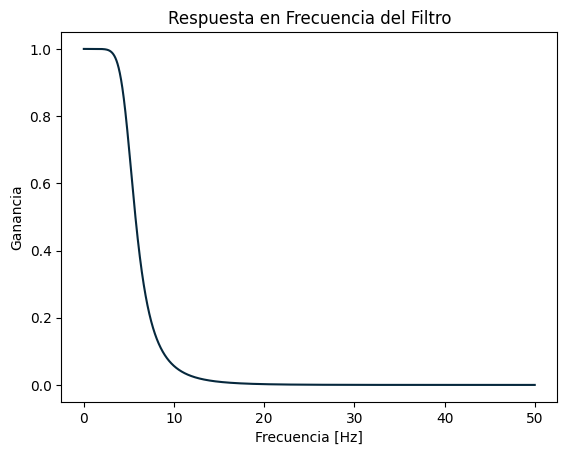

In [27]:
# Visualizar la respuesta en frecuencia del filtro

plt.plot(0.5 * sampling_frequency * w / np.pi, np.abs(h), '#06283D')
plt.title("Respuesta en Frecuencia del Filtro")
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Ganancia')
plt.show()


In [28]:

# Cargar el archivo de audio
audio_file_path = "ACDC.wav"  # Cambia esto a la ruta de tu archivo de audio
audio_signal, sr = librosa.load(audio_file_path, sr=None)

# Parámetros del filtro
fc = 500.0  # Frecuencia de corte en Hz
fs = sr

# Diseñar el filtro
b, a = derivative_filter(fc, fs)

# Aplicar el filtro al audio
filtered_audio = apply_filter(audio_signal, b, a)

# Visualizar la forma de onda del audio original y filtrado
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
librosa.display.waveshow(audio_signal, sr=sr)
plt.title('Forma de onda del audio original')

plt.subplot(2, 1, 2)
librosa.display.waveshow(filtered_audio, sr=sr)
plt.title('Forma de onda del audio filtrado')

plt.show()


NameError: ignored

In [ ]:
# Reproducir el audio filtrado
print("Reproduciendo audio filtrado:")
Audio(data=filtered_audio, rate=sr)